In [1]:
%pip install teeplot
from teeplot import teeplot as tp


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# OSF identifiers
consolidating_trie_id = "85nhu"
searchtable_id = "6k5jn"
niave_trie_id = "4egpc"

# Load CSV files into DataFrames directly from OSF URLs
consolidating_trie_df = pd.read_csv(f"https://osf.io/{consolidating_trie_id}/download")
searchtable_df = pd.read_csv(f"https://osf.io/{searchtable_id}/download")
niave_trie_df = pd.read_csv(f"https://osf.io/{niave_trie_id}/download")

# Add 'Type' column to each DataFrame, organizing
consolidating_trie_df['Type'] = 'Consolidating Trie'
searchtable_df['Type'] = 'Search Table'
niave_trie_df['Type'] = 'Naive Trie'

# Rename columns for consistency
consolidating_trie_df.rename(columns={'Real Time (s)': 'run_time', 'CPU Time (s)': 'cpu_time', 'Selection Type': 'selection_type'}, inplace=True)
searchtable_df.rename(columns={'Real Time (s)': 'run_time', 'CPU Time (s)': 'cpu_time', 'Selection Type': 'selection_type'}, inplace=True)
niave_trie_df.rename(columns={'Real Time (s)': 'run_time', 'CPU Time (s)': 'cpu_time', 'Selection Type': 'selection_type'}, inplace=True)

# Concatenate all DataFrames, easier to plot after
combined_df = pd.concat([consolidating_trie_df, searchtable_df, niave_trie_df])

# Define number of tips for each selection type, normalizing
num_tips = {'nk_tournamentselection': 17, 'nk_lexicaseselection': 233, 'nk_ecoeaselection': 492}

# Normalize run_time and cpu_time by number of tips
combined_df['num_tips'] = combined_df['selection_type'].map(num_tips)
combined_df['normalized_run_time'] = combined_df['run_time'] / combined_df['num_tips']
combined_df['normalized_cpu_time'] = combined_df['cpu_time'] / combined_df['num_tips']

# Convert normalized run_time and cpu_time to tips per second
combined_df['tips_per_sec_run'] = 1 / combined_df['normalized_run_time']
combined_df['tips_per_sec_cpu'] = 1 / combined_df['normalized_cpu_time']


teeplots/viz=custom-barplot-tips-run+x=type+y=tips-per-sec-run+ext=.pdf
teeplots/viz=custom-barplot-tips-run+x=type+y=tips-per-sec-run+ext=.png


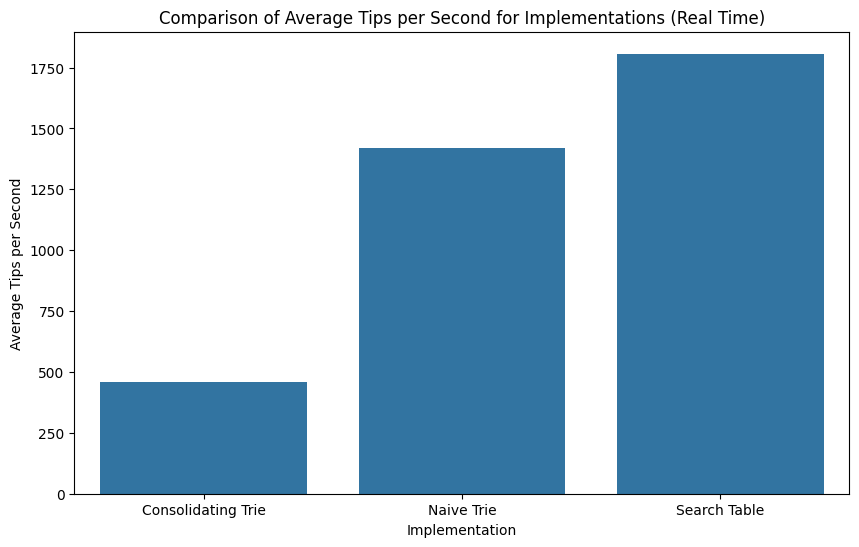

In [3]:
# Create a bar chart to compare average normalized tips per second (real time)
avg_tips_per_sec_run = combined_df.groupby('Type')['tips_per_sec_run'].mean().reset_index()

def custom_barplot_tips_run(data, x, y):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=data)
    plt.title('Comparison of Average Tips per Second for Implementations (Real Time)')
    plt.xlabel('Implementation')
    plt.ylabel('Average Tips per Second')

# Use tp.tee() to call the custom function and save the plot
tp.tee(custom_barplot_tips_run, data=avg_tips_per_sec_run, x='Type', y='tips_per_sec_run')


teeplots/viz=custom-barplot-tips-cpu+x=type+y=tips-per-sec-cpu+ext=.pdf
teeplots/viz=custom-barplot-tips-cpu+x=type+y=tips-per-sec-cpu+ext=.png


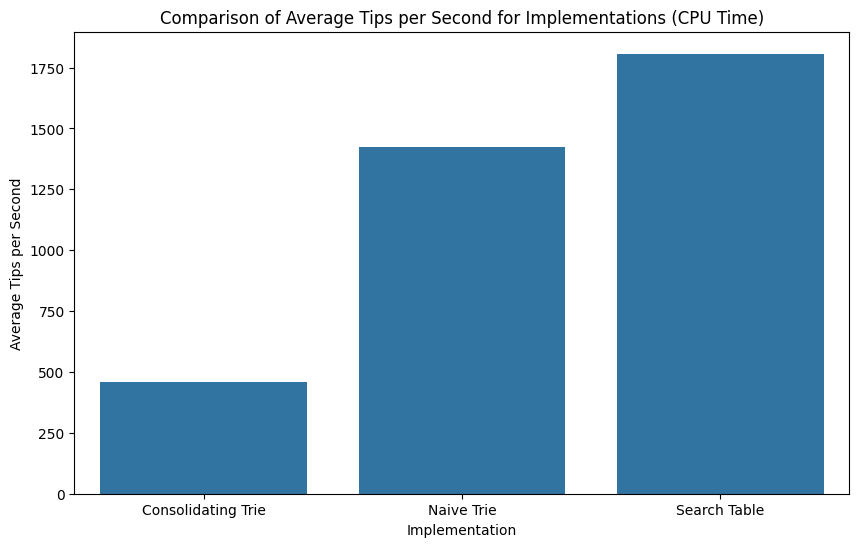

In [4]:
# Create a bar chart to compare average normalized tips per second (CPU time)
avg_tips_per_sec_cpu = combined_df.groupby('Type')['tips_per_sec_cpu'].mean().reset_index()

def custom_barplot_tips_cpu(data, x, y):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=data)
    plt.title('Comparison of Average Tips per Second for Implementations (CPU Time)')
    plt.xlabel('Implementation')
    plt.ylabel('Average Tips per Second')

# Use tp.tee() to call the custom function and save the plot
tp.tee(custom_barplot_tips_cpu, data=avg_tips_per_sec_cpu, x='Type', y='tips_per_sec_cpu')
